In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler

## Exploratory Data Analysis

In [2]:
train = pd.read_csv('data/train_FD001.txt', sep=' ', header=None)
test = pd.read_csv('data/test_FD001.txt', sep=' ', header=None)
test_labels = pd.read_csv('data/RUL_FD001.txt', sep=' ', header=None)

In [3]:
train.shape, test.shape, test_labels.shape

((20631, 28), (13096, 28), (100, 2))

In [4]:
# check data values
display(train)
display(test)
display(test_labels)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN
...,...,...
95,137,NaN
96,82,NaN
97,59,NaN
98,117,NaN


In [5]:
# columns 26 and 27 are useless with NaN values
train = train.drop(columns=[26, 27], axis=1)
test = test.drop(columns=[26, 27], axis=1)

# column 1 is useless with NaN values
test_labels = test_labels.iloc[:, 0]

In [6]:
# actual column names: 
columns = ['unit_number', 'time_cycles']
columns += [f'setting_{i}' for i in range(1, 4)]
columns += [f'sensor_{i}' for i in range(1, 22)]

# rename df columns
train.columns = test.columns = columns
display(train)

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [7]:
# compute RUL for all of training data
train['RUL'] = train[['unit_number', 'time_cycles']].apply(lambda row: train[train['unit_number'] == row['unit_number']]['time_cycles'].max() - row['time_cycles'], axis=1)
display(train)

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [8]:
train.describe() 
# there exist drastically different means and standard deviations for measurements

,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [9]:
scaler = StandardScaler()
train.iloc[:, 2:-1] = scaler.fit_transform(train.iloc[:, 2:-1])
test.iloc[:, 2:] = scaler.transform(test.iloc[:, 2:])

In [10]:
train.iloc[:, 2:-1].describe() 
# notice that we want to drop the columns with 0 mean and 0 standard deviation

,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,2.063100e+04,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04,2.063100e+04,2.063100e+04,2.063100e+04,2.063100e+04,2.063100e+04,2.063100e+04,20631.0,2.063100e+04,2.063100e+04,2.063100e+04,2.063100e+04,2.063100e+04,2.063100e+04,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04
mean,1.377622e-18,-2.720802e-17,0.0,0.0,6.410348e-14,-4.959437e-14,9.285169e-16,-1.776357e-15,-6.469426e-12,-3.161641e-14,1.008249e-12,-4.185765e-14,0.0,-2.937089e-15,-1.199702e-13,3.493855e-13,3.061075e-15,-3.244023e-14,-1.387779e-17,1.666922e-14,0.0,0.0,4.156146e-14,2.402296e-14
std,1.000024e+00,1.000024e+00,0.0,0.0,1.000024e+00,1.000024e+00,1.000024e+00,0.000000e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,0.0,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,0.000000e+00,1.000024e+00,0.0,0.0,1.000024e+00,1.000024e+00
min,-3.973523e+00,-2.055419e+00,0.0,0.0,-2.941625e+00,-3.177804e+00,-2.964737e+00,-1.776357e-15,-7.057993e+00,-3.974497e+00,-2.770375e+00,-1.970486e+00,0.0,-2.587860e+00,-3.692663e+00,-3.005574e+00,-2.296780e+00,-3.126205e+00,-1.387779e-17,-3.364479e+00,0.0,0.0,-3.741634e+00,-3.653688e+00
25%,-6.817340e-01,-6.904875e-01,0.0,0.0,-7.118085e-01,-6.953381e-01,-7.303888e-01,-1.776357e-15,1.416833e-01,-6.301317e-01,-6.572157e-01,-5.498936e-01,0.0,-7.157686e-01,-6.148450e-01,-7.807925e-01,-5.508429e-01,-7.264689e-01,-1.387779e-17,-7.817098e-01,0.0,0.0,-6.432961e-01,-6.273114e-01
50%,4.055368e-03,-8.021809e-03,0.0,0.0,-8.186036e-02,-6.901297e-02,-9.930481e-02,-1.776357e-15,1.416833e-01,8.167571e-02,-9.370652e-02,-2.075387e-01,0.0,-1.166993e-01,9.020580e-02,-8.554830e-02,-1.684195e-01,-8.653932e-02,-1.387779e-17,-1.360176e-01,0.0,0.0,7.596096e-02,7.570228e-02
75%,6.898448e-01,1.015677e+00,0.0,0.0,6.380804e-01,6.290786e-01,6.245530e-01,-1.776357e-15,1.416833e-01,7.256920e-01,6.106800e-01,1.891583e-01,0.0,5.946956e-01,7.274632e-01,6.096959e-01,2.389047e-01,6.253823e-01,-1.387779e-17,5.096747e-01,0.0,0.0,7.398906e-01,7.122022e-01
max,3.981634e+00,2.039375e+00,0.0,0.0,3.697829e+00,4.303846e+00,3.617202e+00,-1.776357e-15,1.416833e-01,3.041891e+00,6.527526e+00,8.121740e+00,0.0,3.702368e+00,2.666353e+00,6.449748e+00,7.861686e+00,3.803699e+00,-1.387779e-17,4.383828e+00,0.0,0.0,3.395609e+00,3.036489e+00


In [11]:
train = train.drop(columns=['setting_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19'])
test = test.drop(columns=['setting_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19'])

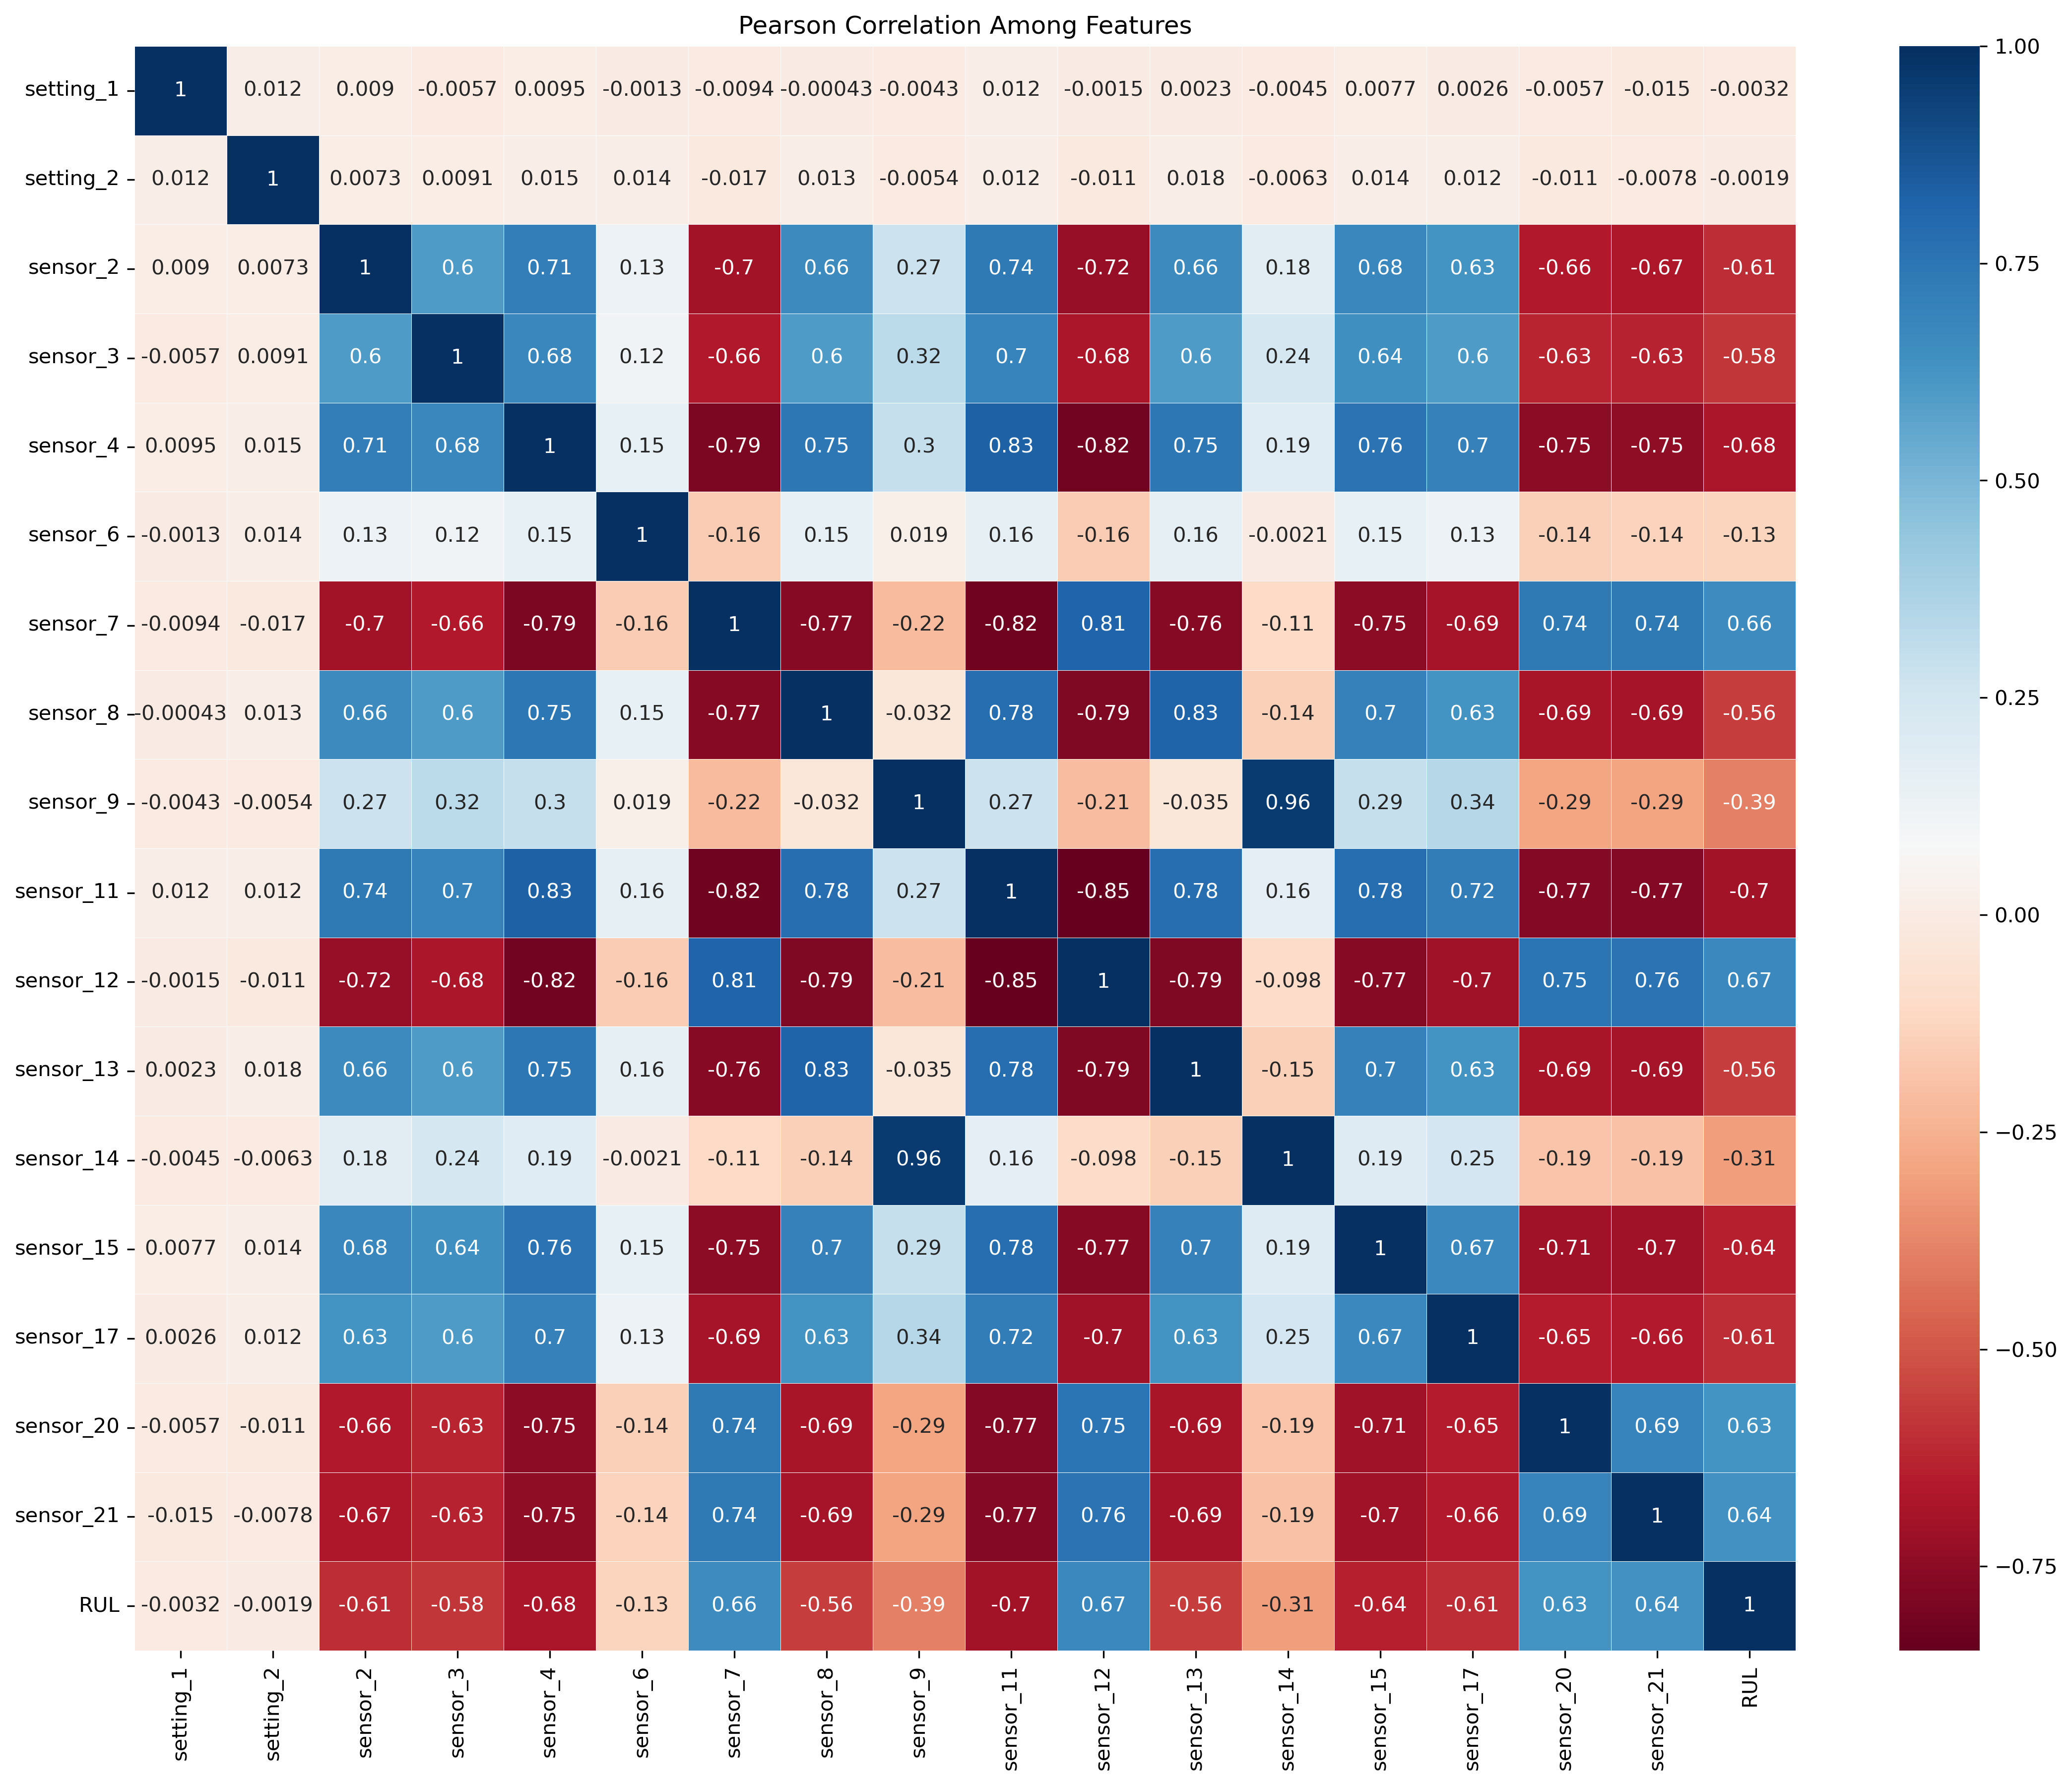

In [12]:
# pearson correlation heatmap
fig = plt.figure(figsize=(18, 14), dpi=300)
sns.heatmap(train.iloc[:, 2:].corr(method='pearson'), annot=True, cmap='RdBu', linewidths=0.2)
plt.title('Pearson Correlation Among Features')
plt.show()

## Data Labeling: Time Sequences

In [12]:
def training_data(train: pd.DataFrame, window: int=30, shift: int=1, max_rul: int=125):
    # create time series training data using moving window
    
    min_cycles = train.groupby(['unit_number'])['time_cycles'].max().min()
    # window size must not be larger than the minimum cycle window
    if window >= min_cycles:
        raise Exception('window size is too large')
    
    x, y = [], []
    for unit in range(train['unit_number'].min(), train['unit_number'].max()+1):
        data = train[train['unit_number'] == unit].sort_values(by='time_cycles', ascending=True).drop(columns=['unit_number', 'time_cycles'], axis=1)
        i, num_windows = data.shape[0]-1, 0
        while i-window >= 0:
            x.append(data.iloc[i-window:i].drop(columns='RUL', axis=1).to_numpy(dtype=np.float32))
            y.append(min(max_rul, data.iloc[i]['RUL']))
            i -= shift
            num_windows += 1
    
    return np.array(x), np.array(y)

In [13]:
def testing_data(test: pd.DataFrame, true: pd.Series, window: int=30, shift: int=1, max_rul: int=125, num_test_windows: int=5):
    # create time series testing data using moving window
    
    min_cycles = test.groupby(['unit_number'])['time_cycles'].max().min()
    # window size must not be larger than the minimum cycle window
    if window >= min_cycles:
        raise Exception('window size is too large, decrease it for training data as well')
    
    num_test_windows = np.inf if num_test_windows is None else num_test_windows
    
    x, y, windows_per_machine = [], [], []
    for unit in range(test['unit_number'].min(), test['unit_number'].max()+1):
        data = test[test['unit_number'] == unit].sort_values(by='time_cycles', ascending=True).drop(columns=['unit_number', 'time_cycles'], axis=1)
        i, test_window = data.shape[0], 1
        while i-window >= 0 and test_window <= num_test_windows:
            x.append(data.iloc[i-window:i].to_numpy(dtype=np.float32))
            if i == data.shape[0]:
                y.append(min(max_rul, true.iloc[unit-1]))
            else:
                y.append(min(max_rul, true.iloc[unit-1] + (test_window-1)*shift))
            test_window += 1
            i -= shift
        windows_per_machine.append(test_window-1)

    return np.array(x), np.array(y), np.array(windows_per_machine), true.to_numpy()

In [22]:
x, y = training_data(train=train, window=30, shift=1, max_rul=125)

# num_test_windows=5 outputs last 5 windows for each machine
xtest, ytest, windows_per_machine, true = testing_data(test=test, true=test_labels, window=30, shift=1, max_rul=125, num_test_windows=5)

np.save('data/sequence data.npy', np.array([x, y, xtest, ytest, windows_per_machine, true], dtype=object))

## Data Labeling: Per Record

In [15]:
def training_data_pr(train: pd.DataFrame, max_rul: int=125):
    # training data already contains an RUL label per record
    x = train.iloc[:, 2:-1].to_numpy()
    y = train.iloc[:, -1].apply(lambda x: min(max_rul, x)).to_numpy()
    return x, y

In [16]:
def testing_data_pr(test: pd.DataFrame, true: pd.Series, max_rul: int=125, num_samples: int=5):
    # create labels per each record of testing data
    
    num_samples = np.inf if num_samples is None else num_samples
    
    x, y, samples_per_machine = [], [], []
    for unit in range(test['unit_number'].min(), test['unit_number'].max()+1):
        samples_per_machine.append(0)
        data = test[test['unit_number'] == unit].sort_values(by='time_cycles', ascending=True).drop(columns=['unit_number', 'time_cycles'], axis=1)
        i, sample = data.shape[0]-1, 1
        while i >= 0 and sample <= num_samples:
            x.append(data.iloc[i].to_numpy())
            y.append(min(max_rul, true.iloc[unit-1]+sample-1))
            sample += 1
            i -= 1
            samples_per_machine[-1] += 1

    return np.array(x), np.array(y), np.array(samples_per_machine), true.to_numpy()

In [23]:
x, y = training_data_pr(train=train, max_rul=125)

# num_samples=5 outputs last 5 test records for each machine
xtest, ytest, samples_per_machine, true = testing_data_pr(test=test, true=test_labels, max_rul=125, num_samples=5)

np.save('data/per record data.npy', np.array([x, y, xtest, ytest, samples_per_machine, true], dtype=object))